Hola Sebastian G!

Mi nombre es Miguel Gutierrez y revisare tu proyecto ! Para darte un contexto, trabajo como cientifico de datos en Mercado Libre. Asi que seras revisado por alguien que aplica a diario todo este tipo de tecnicas en su vida laboral ! Espero una vez finalizes este bootcamp, tambien lo apliques ! Buena suerte !

Cuando vea un error la primera vez, lo señalare. Dejare que encuentres la solucion. Tambien en el texto hare algunas observaciones de como podrias mejorar el codio y tambien hare comentarios de tus percepciones sobre el tema. Si no pueds manejar la tarea, te dare una pista precisa en la siguiente iteraciones y algunos ejemplos practicos. Estare abierto a cualquierda duda y discusion respecto al tema. En general los comentarios de advertencia tu decides si tomarlos o no. No es necesario que acates todos los cambios de advertencia.

Encontraras mis comentarios en el siguiente formato - *Por favor no mueves, modifiques o elimines los comentarios*.

Podras encontrar mis comentarios en verde, amarillo o rojo como estos:


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente. Todo esta perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Comentarios. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Necesita ser arreglado. El bloque requiere algunas correciones. El trabajo no podra ser acceptado si tiene comentarios en rojo.
</div>

Puedes responderme utilizando este tipo de comentario:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Propósito del proyecto: Determinar qué plan (surf o ultimate) es mejor para aconsejar a el departamento comercial acerca del presupuesto de publicidad.**

Se estudiará la muestra de 500 usuarios para analizar el comportamiento del consumo y se buscaran respuesta a preguntas como: 

- ¿Qué plan usa más minutos, mensajes e Internet en promedio? 
- ¿Tienen estos planes tendencias diferentes o similares, los usuarios exceden los servicios ya incluidos en el plan? 
- ¿Qué plan genera más ingresos?

**Interpretar los datos**: contamos con 5 tablas que nos brindan información importante acerca de:

- `users` nos indica **características del usuario** como (id, nombre, edad y ciudad) lo cual nos permite hacer análisis demográficos. También nos indica datos de su (plan) y de fechas como (registro y cancelación) 


- `calls` permitirá analizar el **número de llamadas y minutos totales por cada usuario** y por fecha, dado que en `users` tenemos el ID de cada usuario y su plan podemos analizar este servicio. 


- `messages` permite conocer el **número total de mensajes enviados por cada usuario** y la fechas en que se realizó, nos ayudara a conocer el comportamiento por usuario y por ende por plan.


- `internet` permite conocer la **cantidad de mb usados por cada usuario en cada sesión**, esta nos permitirá conocer el uso de internet.


- `plans` contiene **la información de las tarifas de cada plan** (tanto base como adicionales) para cada uno de los servicios, será importante para determinar el ingreso por usuario y por plan teniendo en cuenta todo el uso de los servicios.

Dadas las tablas que tenemos, es importante consolidar la información por usuario en una tabla que permita determinar el uso de servicios y el ingreso originado en cada uno de ellos. Posterior mente podemos analizar para cada plan cual es el ingreso promedio.



## Inicialización

In [1]:
import pandas as pd 
import numpy as np
import math as mt
from scipy import stats as st 
import matplotlib.pyplot as plt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


`mb_per_month_included` debe convertirse a GB usando la formula (1gb = 1024 Mb)

## Corregir datos

In [5]:
#Megaline cobra por gb no mb, creo una col con los valores en Gb (1 GB = 1024 Mb)

plans["mb_per_month_included"] = plans["mb_per_month_included"]/1024                         
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

In [6]:
#convierto a int y uso rename para indicar que ahora los valores están en Gb
#cambio el nombre de la columna "plan_name" a plan para poder unirla a otras tablas

plans = plans.astype({"mb_per_month_included": int})
plans.rename(columns = {"mb_per_month_included":"gb_per_month_included", "plan_name":"plan"}, inplace = True) 
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.sample(5, random_state = 1)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaN
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaN
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaN


1. `churn_date` contine valores asuenes por los usuarios activos 
2. `city` contiene valores repetitivos que podemos remover como "MSA"


### Corregir los datos

In [9]:
users['churn_date'] = users['churn_date'].fillna("")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

In [10]:
users['city'] = users['city'].str.replace("MSA","")
users.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV",2018-10-21,surf,


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
calls.sample(3,random_state = 1 )

,id,user_id,call_date,duration
106231,1374_327,1374,2018-12-17,1.17
109017,1385_87,1385,2018-10-20,14.02
76096,1268_600,1268,2018-09-24,12.21


1. No hay datos ausentes en la tabla.
2. `duration` contiene los minutos en decimales, Megaline cobra el minuto completo (usar np.ceil) para resolver este problema.

### Corregir los datos

In [13]:
# uso el método apply() con np.ceil para corregir la columna 'duration'

calls['duration'] = calls['duration'].apply(np.ceil)             # uso appy(np.ceil)
calls['duration']= calls['duration'].astype({'duration': int})   # convierto a int

calls.rename(columns = {"duration":"minutes"}, inplace = True)   # renombro a "minutes"
calls.head()

,id,user_id,call_date,minutes
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Enriquecer los datos

In [14]:
# agrego columnas de mes y año para poder agrupar más adelante

# uso to_datetime mes para crear la columna de "month"
# uso to_datetime año para crear la columna de "year"

calls['month'] = pd.to_datetime(calls['call_date']).dt.month   
calls['year'] = pd.to_datetime(calls['call_date']).dt.year     
calls.head(3)

,id,user_id,call_date,minutes,month,year
0,1000_93,1000,2018-12-27,9,12,2018
1,1000_145,1000,2018-12-27,14,12,2018
2,1000_247,1000,2018-12-27,15,12,2018


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
messages.sample(5, random_state = 1)

,id,user_id,message_date
12922,1084_162,1084,2018-11-17
55949,1354_99,1354,2018-10-04
19111,1123_180,1123,2018-11-04
46123,1314_11,1314,2018-12-15
72141,1467_473,1467,2018-05-18


No hay valores ausentes en la tabla. Todo parece en orden

### Corregir los datos

No hay datos obvios por corregir en la tabla de mensajes.

### Enriquecer los datos

In [17]:
# agrego columnas de mes y año para poder agrupar más adelante

# uso to_datetime mes 
# uso to_datetime año

messages['month'] = pd.to_datetime(messages['message_date']).dt.month
messages['year'] = pd.to_datetime(messages['message_date']).dt.year
messages.head(3)

,id,user_id,message_date,month,year
0,1000_125,1000,2018-12-27,12,2018
1,1000_160,1000,2018-12-31,12,2018
2,1000_223,1000,2018-12-31,12,2018


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet

internet.sample(5, random_state = 1)

,id,user_id,session_date,mb_used
13106,1062_76,1062,2018-09-15,225.79
70950,1331_201,1331,2018-09-28,169.69
6195,1035_43,1035,2018-12-27,124.84
2400,1011_140,1011,2018-06-26,0.00
25926,1121_19,1121,2018-12-16,504.92


1. `mb_used` debe convertirse a gb pero solo redondearse para el valor del mes (no de cada sesión).

### Corregir los datos

In [20]:
# uso la formula (1 gb = 1024 mb) para convertir los valores
# renombro la columna como "gb_used"

internet['mb_used'] = internet['mb_used']/1024
internet.rename(columns = {"mb_used":"gb_used"}, inplace = True) 

### Enriquecer los datos

In [21]:
# agrego columnas de mes y año para poder agrupar más adelante

# uso to_datetime mes para crear la columna de "month"
# uso to_datetime año para crear la columna de "year"

internet['month'] = pd.to_datetime(internet['session_date']).dt.month
internet['year'] = pd.to_datetime(internet['session_date']).dt.year
internet.head(3)

,id,user_id,session_date,gb_used,month,year
0,1000_13,1000,2018-12-29,0.087754,12,2018
1,1000_204,1000,2018-12-31,0.000000,12,2018
2,1000_379,1000,2018-12-28,0.644922,12,2018


## Estudiar las condiciones de las tarifas

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# uso pivot_table para agrupar por usuario y mes el número de llamadas

user_calls = calls.pivot_table(index=['user_id',"month"],      #por usuario y mes
                                values="id",                   #id de cada llamada
                                aggfunc={"id": "count"}        #contar llamadas
                              )
                                         

user_calls = user_calls.reset_index()                          #uso reset_index()
user_calls.rename(columns = {"id":"calls"}, inplace = True)    #renombro "calls"
user_calls.head()

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# uso pivot_table para agrupar por usuario y mes el número de minutos

user_mins = calls.pivot_table(index=['user_id', 'month'],         #por usuario y mes
                           values= "minutes",                  #numero de minutos
                           aggfunc={"minutes": "sum"},         #sumar minutos 
                                )

user_mins = user_mins.reset_index()                            #uso reset_index
user_mins.head()

,user_id,month,minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# uso pivot_table para agrupar por usuario y mes el número de mensajes

user_msg = messages.pivot_table(index=['user_id',"month"],    #por usuario y mes
                                values="id",                  #id de cada mensaje
                                aggfunc={"id": "count"}       #contar mensajes
                               )
                               

user_msg = user_msg.reset_index()                                 #uso reset_index()
user_msg.rename(columns = {"id":"messages"}, inplace = True)      #renombro a mensajes
user_msg.head()


,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# uso pivot_table para agrupar por usuario y mes el número de gb usadas

user_internet = internet.pivot_table(index=['user_id',"month"],    #por usuario y mes
                                values="gb_used",                  #gb usadas
                                aggfunc={"gb_used": "sum"}         #sumar gb
                                     )

user_internet = user_internet.reset_index()                         #uso reset_index()


#ejemplo en instrucciones (web/mes 1205 mb -> 2gb)
user_internet['gb_used'] = user_internet['gb_used'].apply(np.ceil)  #round up por mes
user_internet.head()

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#uso merge con user_id y month como llaves

user_consum = pd.merge(user_calls, user_mins, on = ['user_id','month'], how="outer")
user_consum = pd.merge(user_consum, user_msg, on = ['user_id','month'], how="outer")
user_consum = pd.merge(user_consum, user_internet, on = ['user_id','month'], how="outer")

#reordeno las columnas de user consum
user_consum = user_consum.loc[:,['user_id', 'month','calls','minutes','messages','gb_used']]
user_consum.head(3)


,user_id,month,calls,minutes,messages,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0


In [28]:
# Añade la información de la tarifa

# añado primero información de los usuarios para tener "plan" como llave
# junto con city y age por si es útil más adelante


user_plan= users[['user_id','plan','city','age']]
user_data = pd.merge(user_consum,user_plan, on="user_id", how='outer')

# añado la información de la tarifa usando merge en "plan"

user_data = pd.merge(user_data,plans, on="plan", how='outer')

user_data.sample(5)



,user_id,month,calls,minutes,messages,gb_used,plan,city,age,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
1468,1240,8.0,161.0,1095.0,15.0,49.0,surf,"Baton Rouge, LA",61,50,15,500,20,10,0.03,0.03
1634,1291,8.0,60.0,472.0,11.0,21.0,surf,"Indianapolis-Carmel-Anderson, IN",65,50,15,500,20,10,0.03,0.03
1168,1141,6.0,18.0,136.0,3.0,2.0,surf,"New York-Newark-Jersey City, NY-NJ-PA",46,50,15,500,20,10,0.03,0.03
296,1199,9.0,66.0,434.0,71.0,16.0,ultimate,"San Antonio-New Braunfels, TX",39,1000,30,3000,70,7,0.01,0.01
1104,1119,11.0,65.0,458.0,128.0,1.0,surf,"Louisville/Jefferson County, KY-IN",60,50,15,500,20,10,0.03,0.03


In [29]:
# Calcula el ingreso mensual para cada usuario

# defino una funcion para poder evaluar cada fila

def revenue_month(row):
    
# plan surf (min adicional = 3¢), (msg adicional = 3¢) y (gb adicional = 10$)
# plan ultimate (min adicional = 1¢), (msg adicional = 1¢) y (gb adicional = 7$)

    if row['plan'] == 'surf':
        rev = 20
        
        if row['minutes'] > row['minutes_included']:
            rev += (row['minutes'] - row['minutes_included']) * row['usd_per_minute']
        if row['messages'] > row['messages_included']:
            rev += (row['messages'] - row['messages_included']) * row['usd_per_message']
        if row['gb_used'] > row['gb_per_month_included']:
            rev += (row['gb_used'] - row['gb_per_month_included']) * row['usd_per_gb']
  

    elif row['plan'] == 'ultimate':
        rev = 70
        
        if row['minutes'] > row['minutes_included']:
            rev += (row['minutes'] - row['minutes_included']) * row['usd_per_minute']
        if row['messages'] > row['messages_included']:
            rev += (row['messages'] - row['messages_included']) * row['usd_per_message']
        if row['gb_used'] > row['gb_per_month_included']:
            rev += (row['gb_used'] - row['gb_per_month_included']) * row['usd_per_gb']
    
    return rev

# creo la col 'revenue_usd', con el resultado de la funcion 
user_data['revenue_usd'] = user_data.apply(revenue_month, axis = 'columns')



Realizare pruebas para dos usuarios:

In [30]:
# relicemos una prueba para un usuario de surf que excedio su plan

user_data[(user_data['plan']=="surf") & (user_data['revenue_usd'] > 20) ].head(1)

# este usuario uso 3 mensajes adiciones y 7gb addicionales por lo cual pago:
# 20 usd base + (3*0.03)+(7*10) = 90.09 - OK

,user_id,month,calls,minutes,messages,gb_used,plan,city,age,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,revenue_usd
726,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA",28,50,15,500,20,10,0.03,0.03,90.09


In [31]:
# relicemos una prueba para un usuario ultimate que excedio su plan

user_data[(user_data['plan']=="ultimate") & (user_data['revenue_usd'] > 70) ].head(1)

#el usuario uso 2gb mas que el limite de 30gb, por lo que pago:
#70 usd +(2gb * 7 usd) = 84 usd OK

,user_id,month,calls,minutes,messages,gb_used,plan,city,age,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,revenue_usd
2,1006,12.0,9.0,59.0,139.0,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA",73,1000,30,3000,70,7,0.01,0.01,84.0


La columna `revenue_usd` nos indica el ingreso total por cada usuario según su consumo base + adicionales

## Estudia el comportamiento de usuario

### Llamadas

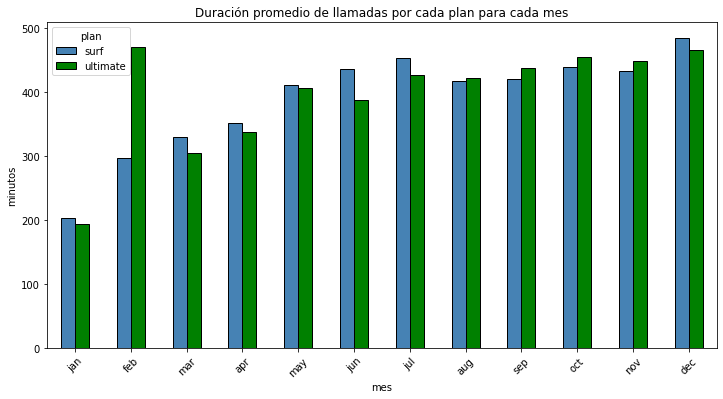

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# creo un df para el promedio de duración por llamada

calls_mean = user_data.groupby(by=['month','plan'])['minutes'].mean().reset_index()
calls_mean['month'] = calls_mean['month'].astype({'month': int})

# creo una lista para los meses de la grafica
x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]                                     
xlabels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] 

# uso pivot para crea un df que se pueda graficar
calls_mean = calls_mean.pivot(index ="month", columns="plan", values = "minutes")

#creo un barchart por mes
calls_mean.plot(kind='bar',
               color={'surf':"steelblue", 'ultimate':'green'},
               figsize=(12,6),
               title= "Duración promedio de llamadas por cada plan para cada mes",
               rot = 45,
               xlabel = "mes",
               ylabel = "minutos",
               edgecolor='black'
               )

plt.xticks(x_axis , xlabels)      # remplazo los valores de x por el nombre del mes
plt.show()


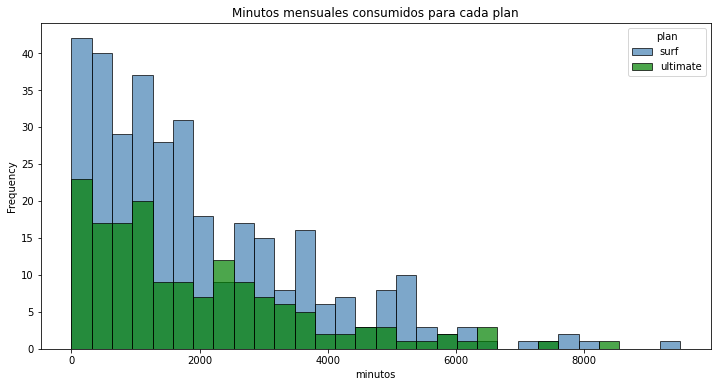

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# agrupo por usuario y plan la cantidad de minutos totales
calls_minutes = user_data.groupby(by=['user_id','plan'])['minutes'].sum().reset_index()

# uso pivot para crea un df que se pueda graficar
calls_minutes = calls_minutes.pivot(index ="user_id", columns="plan", values = "minutes")

#creo un histograma por mes
calls_minutes.plot(kind='hist',
                   bins=30,
                   color={'surf':"steelblue", 'ultimate':'green'},
                   alpha= 0.7,
                   figsize=(12,6),
                   title= "Minutos mensuales consumidos para cada plan",
                   edgecolor='black'
                  )

plt.xlabel("minutos")  #nombre eje x
plt.show()

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# uso una pivot table para crear "plan" en filas y mostrar mean, var y sum
user_data.pivot_table(index= 'plan', values = 'minutes', aggfunc =['mean', 'var', 'sum'])

,mean,var,sum
,minutes,minutes,minutes
plan,,,
surf,436.519741,52571.063243,674423.0
ultimate,434.676017,56573.632247,309924.0


In [35]:
# como surf usa el doble de minutos investigare el total de llamadas y usuarios
user_data.pivot_table(index= 'plan', values = ['user_id', 'calls'], aggfunc = ['count'])

count        
         calls user_id
plan                  
surf      1545    1579
ultimate   713     724

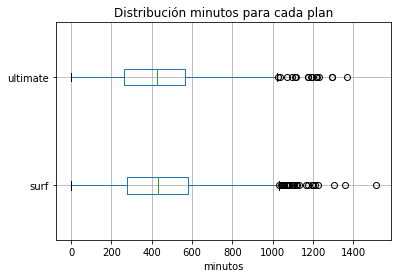

In [36]:
# crear una grafico de cajas y bigotes

# separo la tabla por usuarios en cada plan
surf_users =  user_data[user_data['plan']=="surf"]
ult_users = user_data[user_data['plan']=="ultimate"]

# creo un df para graficar con las columnas de minutes en cada plan
calls_box = pd.DataFrame({"surf": surf_users["minutes"] , "ultimate": ult_users["minutes"]})


#creo una caja y bigotes para cada columna de calls_box

calls_box[["surf", "ultimate"]].plot(kind='box',
                                     title='Distribución minutos para cada plan',
                                     grid = True,
                                     vert = False)


plt.xlabel("minutos")
plt.show()

**Llamadas:**

**El promedio de minutos para cada plan es similar:** Los usuarios del plan surf usan 436.52 min/mes en comparación a ultimate 434.68 min/mes, sin embargo, la cantidad de de usuarios surf en la muestra es el doble de la de Ultimate. Teniendo en cuenta las condiciones de los planes:

**surf**: Contiene 500 min/mes incluidos, podemos ver que es usual que **los usuarios puedan necesitar minutos adicionales cada mes.**


**ultimate**: **No es común que un usuario sobrepase el límite de 3000 min/mes** incluidos en su plan.



### Mensajes

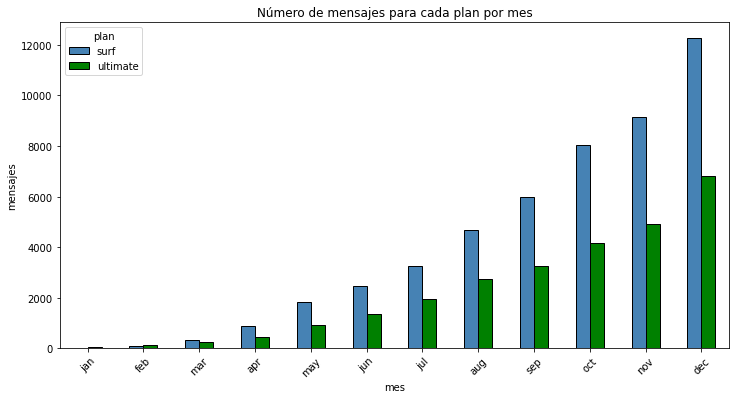

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# agrupo por mes y plan la cantidad de mensajes totales
msg_total = user_data.groupby(by=['month','plan'])['messages'].sum().reset_index()
msg_total['month'] = msg_total['month'].astype({'month': int})

# uso pivot para crea un df que se pueda graficar
msg_total = msg_total.pivot(index ="month", columns="plan", values = "messages")

#creo un barchart por mes
msg_total.plot(kind='bar',
               color={'surf':"steelblue", 'ultimate':'green'},
               figsize=(12,6),
               rot = 45,
               xlabel = "mes",
               ylabel = "mensajes",
               title = "Número de mensajes para cada plan por mes",
               edgecolor='black'
              )

plt.xticks(x_axis , xlabels)         #Remplazo los valores de x por el nombre del mes
plt.show()

Ambos planes en uso de msg han aumentado para el año, pero **surf se ha incrementado casi el doble** que ultimate.

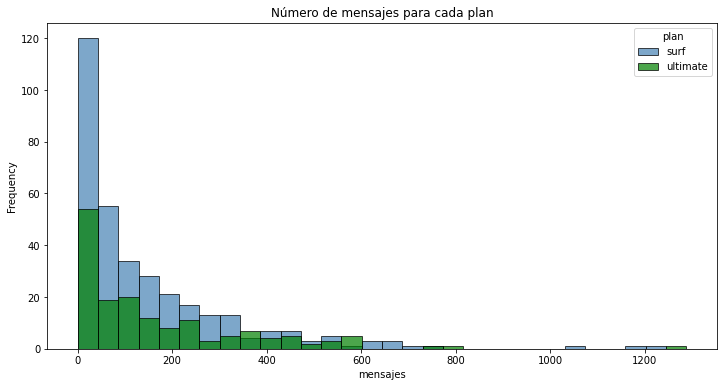

In [38]:
# agrupo por usuario y plan la cantidad de mensajes totales
msg_hist = user_data.groupby(by=['user_id','plan'])['messages'].sum().reset_index()

# uso pivot para crea un df que se pueda graficar
msg_hist = msg_hist.pivot(index ="user_id", columns="plan", values = 'messages')

#creo un histograma por mes
msg_hist.plot(kind='hist',
                   bins=30,
                   color={'surf':"steelblue", 'ultimate':'green'},
                   alpha= 0.7,
                   figsize=(12,6),
                   title= "Número de mensajes para cada plan",
                   edgecolor='black'
                  )

plt.xlabel("mensajes")      #nombre eje x 
plt.show()

In [39]:
# Calcula la media y la varianza de la cantidad mensual de mensajes.
# uso una pivot table para crear "plan" en filas y mostrar mean, var y sum
user_data.pivot_table(index= 'plan', values = "messages", aggfunc =['mean', 'var', 'sum'])

,mean,var,sum
,messages,messages,messages
plan,,,
surf,40.109656,1091.344231,49014.0
ultimate,46.296233,1085.183108,27037.0


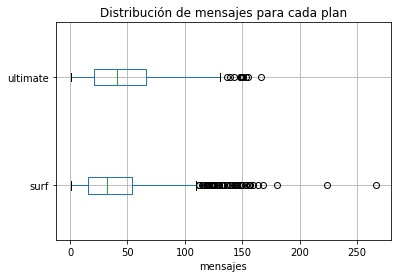

In [40]:
# creo un df para graficar con las columnas de mensajes en cada plan
msg_box = pd.DataFrame({"surf": surf_users["messages"] , "ultimate": ult_users["messages"]})

#creo una caja y bogotes para cada columna de msg_box
msg_box[["surf", "ultimate"]].plot(kind='box',
                                     title= 'Distribución de mensajes para cada plan',
                                     grid = True,
                                     vert = False)
plt.xlabel("mensajes")  
plt.show()



**Mensajes:**

**El promedio de mensajes de ultimate es mayor :** Los usuarios del plan ultimate envían 46.30 msg/mes en comparación a surf 40.11 msg/mes.


**surf**: Contiene 50 msg/mes incluidos, **existen casos donde los usuarios necesitan mensajes adicionales** sin embargo la gran mayoría de usuarios no superan su base.


**ultimate**: Si bien hay un poco más de variación, **no hay usuarios que hayan superado los 1000 msg ya incluidos**




### Internet

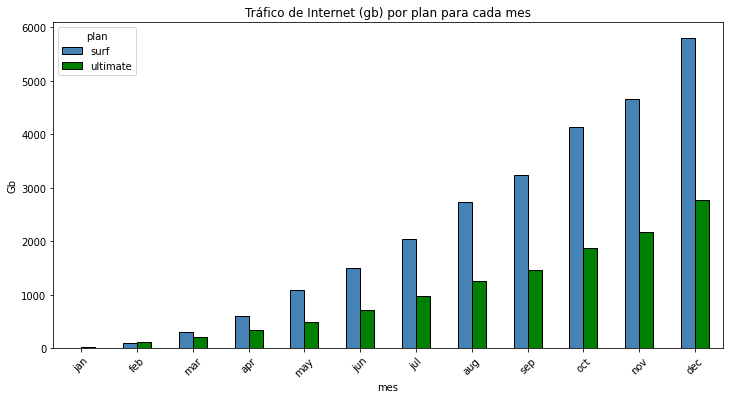

In [41]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# agrupo por mes y plan la cantidad de gb totales
inter_total = user_data.groupby(by=['month','plan'])['gb_used'].sum().reset_index()
inter_total['month'] = inter_total['month'].astype({'month': int})

# uso pivot para crea un df que se pueda graficar
inter_total = inter_total.pivot(index ="month", columns="plan", values = "gb_used")

# creo un barchart por mes
inter_total.plot(kind='bar',
                 color={'surf':"steelblue", 'ultimate':'green'},
                 figsize=(12,6),
                 rot = 45,
                 xlabel = "mes",
                 ylabel = "Gb",
                 title = "Tráfico de Internet (gb) por plan para cada mes",
                 edgecolor='black'
                
                )

plt.xticks(x_axis , xlabels)       #Remplazo los valores de x por el nombre del mes
plt.show()

Ambos planes en uso de gb han aumentado para el año, pero **surf se ha incrementado casi el doble** que ultimate.

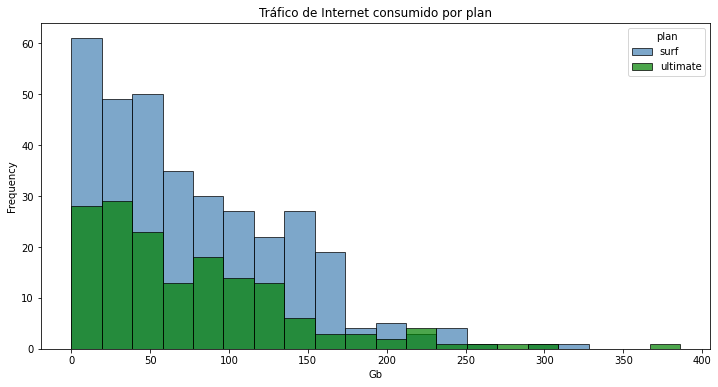

In [42]:
#Compara el trafico mensual que necesitan los usuarios de cada plan. Traza un histograma.

# agrupo por usuario y plan la cantidad de gb totales
inter_hist = user_data.groupby(by=['user_id','plan'])['gb_used'].sum().reset_index()

# uso pivot para crea un df que se pueda graficar
inter_hist = inter_hist.pivot(index ="user_id", columns="plan", values = 'gb_used')

#creo un histograma por mes
inter_hist.plot(kind='hist',
                   bins=20,
                   color={'surf':"steelblue", 'ultimate':'green'},
                   alpha= 0.7,
                   figsize=(12,6),
                   title= "Tráfico de Internet consumido por plan",
                   edgecolor='black'
                  )

plt.xlabel("Gb")     #nombre eje x 
plt.show()

In [43]:
# Calcula la media y la varianza de la cantidad mensual de internet.
# uso una pivot table para crear "plan" en filas y mostrar mean, var y sum
user_data.pivot_table(index= 'plan', values = "gb_used", aggfunc =['mean', 'var', 'sum'])

,mean,var,sum
,gb_used,gb_used,gb_used
plan,,,
surf,16.831194,59.473734,26223.0
ultimate,17.331015,58.494733,12461.0


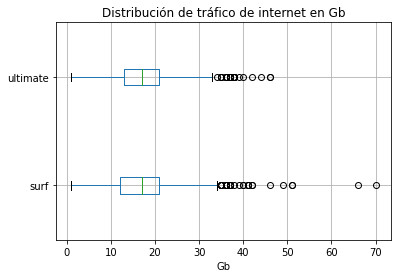

In [44]:
# creo un df para graficar con las columnas de gb en cada plan
inter_box = pd.DataFrame({"surf": surf_users["gb_used"] , "ultimate": ult_users["gb_used"]})

#creo una caja y bogotes para cada columna de inter_box
inter_box[["surf", "ultimate"]].plot(kind='box',
                                     title='Distribución de tráfico de internet en Gb',
                                     grid = True,
                                     vert = False,
                                  )

plt.xlabel("Gb")
plt.show()

**Internet:**

**El promedio de gb sugiere que no existe una diferencia notable** en el consumo de internet para usuarios de Ultimate (17.33 gb/mes) vs surf (16.83 gb/mes).** en el contexto de cada plan:


**surf**: los usuarios fácilmente pueden **exceder los 15 gb incluidos en su plan** por lo cual deben incurrir en consumos adicionales ($10 por cada gb)


**ultimate**: para Ultimate pocos usuarios exceden los 30gb incluidos en el plan, además en promedio **solo se consume poco más de la mitad de base** para internet.




## Ingreso

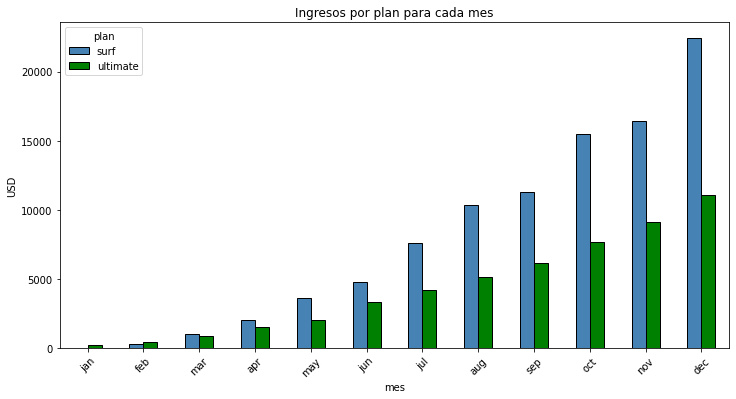

In [45]:
# agrupo por mes y plan la cantidad de ingresos totales
rev_plan = user_data.groupby(by=['month','plan'])['revenue_usd'].sum().reset_index()
rev_plan['month'] = rev_plan['month'].astype({'month': int})

# uso pivot para crea un df que se pueda graficar
rev_plan = rev_plan.pivot(index ="month", columns="plan", values = "revenue_usd")

## #creo un barchart por mes
rev_plan.plot(kind='bar',
              color={'surf':"steelblue", 'ultimate':'green'},
              figsize=(12,6),
              rot = 45,
              xlabel = "mes",
              ylabel = "USD",
              title = "Ingresos por plan para cada mes",
              edgecolor='black')


plt.xticks(x_axis , xlabels)                  #Remplazo los valores de x por el nombre del mes
plt.show()

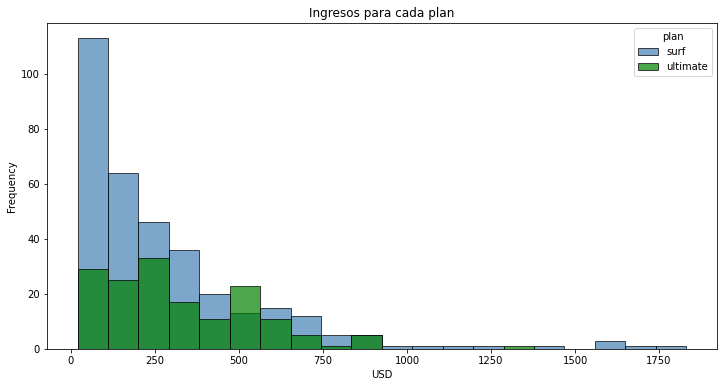

In [46]:
# agrupo por usuario y plan la cantidad de ingresos totales
rev_hist = user_data.groupby(by=['user_id','plan'])['revenue_usd'].sum().reset_index()

# uso pivot para crea un df que se pueda graficar
rev_hist = rev_hist.pivot(index ="user_id", columns="plan", values = 'revenue_usd')

#creo un histograma por mes
rev_hist.plot(kind='hist',
                   bins=20,
                   color={'surf':'steelblue', 'ultimate':'green'},
                   alpha= 0.7,
                   figsize=(12,6),
                   title= "Ingresos para cada plan",
                   edgecolor='black'
                  )

plt.xlabel("USD")     #nombre eje x
plt.show()

In [47]:
# Calcula la media y la varianza de la cantidad mensual de ingreso.
# uso una pivot table para crear "plan" en filas y mostrar mean, var y sum
user_data.pivot_table(index= 'plan', values = "revenue_usd", aggfunc =['mean', 'var','sum'])

,mean,var,sum
,revenue_usd,revenue_usd,revenue_usd
plan,,,
surf,60.551729,3062.446864,95611.18
ultimate,72.301105,129.159556,52346.00


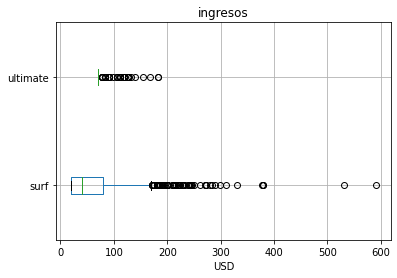

In [48]:
# creo un df para graficar con las columnas de usd en cada plan
rev_box = pd.DataFrame({"surf": surf_users["revenue_usd"] , "ultimate": ult_users["revenue_usd"]})

#creo una caja y bigotes para cada columna de rev_box
rev_box[["surf", "ultimate"]].plot(kind='box',
                                     title='ingresos',
                                     grid = True,
                                     vert = False,
                                  )
plt.xlabel("USD")
plt.show()

In [49]:
# dado el grafico quiero saber cuánto ingreso es fijo y cuanto variable por cada plan?

# creo una tabla con los ingresos de cada usuario
variable_income = user_data[['user_id','month','plan', 'usd_monthly_pay', 'revenue_usd']].reset_index()

#creo la col add_revenue restando el precio base al ingreso final
variable_income["add_revenue_usd"] = variable_income["revenue_usd"] - variable_income["usd_monthly_pay"]

#creo una pivot table 
variable_income = variable_income.pivot_table(index= 'plan', values = ["usd_monthly_pay", "add_revenue_usd"], aggfunc =['sum'])
variable_income.rename(columns = {"usd_monthly_pay": 'fixed_revenue',
                       "add_revenue_usd": 'additionals_revenue'})

# quiero ver en porcentaje que representa cada plan del ingreso total de megaline
np.round((variable_income/147957.18),2)

sum                
         add_revenue_usd usd_monthly_pay
plan                                    
surf                0.43            0.21
ultimate            0.01            0.34


**Ingreso:**

1. **surf genera el 64% del ingreso de la muestra** (ingresos variables)

    Surf no solo tiene más usuarios, también estos **tienden a sobrepasar los valores incluidos para minutos e internet** por lo cual **el 43% de los ingresos provienen de consumos adicional**, esto se explica por el análisis de cada servicio, en el cual evidenciamos que el uso es mayor además de los costos asociados a cada adición.


2. **ultimate genera el 35% del ingreso de la muestra** (ingresos fijos)

    Por otro lado **ultimate es un plan con ingresos que no varían** ya que la mayoría de los usuarios casi nunca necesitan más que sus valores base y solo usa en promedio la mitad de estos. Además de que estos son más económicos en caso de necesitarse.

Podemos confírmalo con los ingresos promedios donde surf (60.55 usd) es 3 veces mayor que su precio base (20 usd). Por el contrario, ultimate es casi igual 72.30 usd.


<div class="alert alert-block alert-success">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Todo ok con el analisis grafico de la data ! </div>

## Prueba las hipótesis estadísticas

###### Son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf?

**H0:** No hay diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

**H1:** Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf no generan los mismos ingresos

In [50]:
# Prueba las hipótesis

#defino un alpha de 0.05 para la prueba
alpha = 0.05

#uso t-student para comparar dos muestras independientes y defino equal_var = Fasle
results = st.ttest_ind(surf_users['revenue_usd'],ult_users['revenue_usd'],equal_var= False)

#extraigo solo el p-value del test
print('p-value:', results.pvalue)


#creo un if para el resultado 
if (results.pvalue < alpha):
    print("Rechazamos H0")     #si el p-value es menor a 5% rechazamos la Hipotesis nula
else:
    print("No rechazamos H0")  #si el p-value es mayor a 5% NO rechazamos la Hipotesis nula

p-value: 1.2184115852123163e-15
Rechazamos H0


**Rechazamos la Hipótesis Nula:** "No hay diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf." 

Tiene sentido ya que como evidenciamos en el análisis, ambos planes tienen promedios y varianzas muy diferentes. Lo podemos ver visualmente en una gráfica.

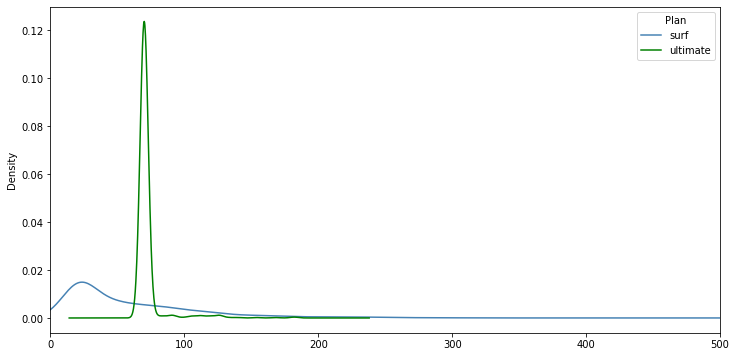

In [51]:
# creo una linea para surf con kind=kde: para graficar la distribución
surf_users['revenue_usd'].plot(kind='kde',
               color = 'steelblue')

# creo una linea para ultimate con kind=kde: para graficar la distribución
ult_users['revenue_usd'].plot(kind='kde',
               color= "green",
               figsize = (12,6),
              xlim=(0,500))


plt.legend(['surf', 'ultimate'], title='Plan')    #agrego una legenda a la grafica

###### El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones??

**H0:** El ingreso promedio de los usuarios del área NY-NJ no es diferente al de los usuarios de otras regiones.

**H1:** El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [52]:
# creo una tabla con solo los datos para NY-NJ
# luego creo una tabla con solo los datos para los estados diferentes 
NY_NJ_users =  user_data[user_data['city'].str.contains("NY-NJ")]
other_users = user_data[user_data['plan'].str.contains("NY-NJ")==False]

In [53]:
# Prueba las hipótesis

alpha = 0.05

#uso t-student para comparar dos muestras independientes y defino equal_var = Fasle
results = st.ttest_ind(NY_NJ_users['revenue_usd'],other_users['revenue_usd'],equal_var= False)

#extraigo solo el p-value del test
print('p-value:', results.pvalue)

#creo un if para el resultado 
if (results.pvalue < alpha):
    print('Rechazamos H0')     #si el p-value es menor a 5% rechazamos la Hipotesis nula
else:
    print("No rechazamos H0")  #si el p-value es mayor a 5% NO rechazamos la Hipotesis nula



p-value: 0.07854084338835131
No rechazamos H0


**No Rechazamos la Hipótesis Nula:** "El ingreso promedio de los usuarios del área NY-NJ no es diferente al de los usuarios de otras regiones."

Si lo vemos gráficamente podemos evidenciar NY-NJ a pesar de tener algunas variaciones tiene una distribución de ingresos muy similar a los otros estados.

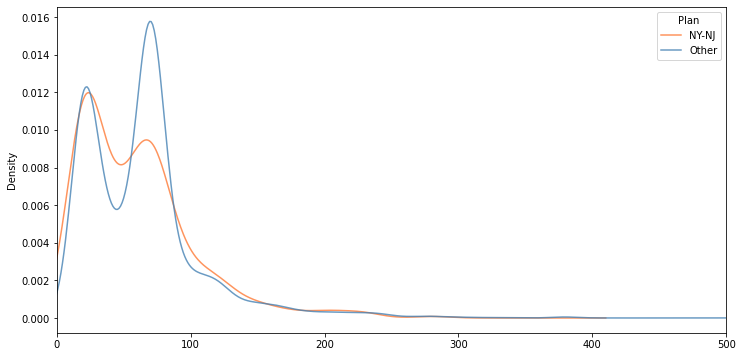

In [54]:
NY_NJ_users['revenue_usd'].plot(kind='kde',
                figsize = (12,6),
                xlim=(0,500),
                color= "#FE7A36",
                alpha =0.8
                )

other_users['revenue_usd'].plot(kind='kde',
                color="steelblue",
                alpha =0.8)

plt.legend(['NY-NJ', 'Other'], title='Plan')

<div class="alert alert-block alert-success">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Todo ok, resultados esperados</div>

## Conclusión general

**Extracción de datos:** se requirió realizar cambios a los datos antes de iniciar con el análisis

1. Plans: `mb_per_month_included` se convirtio a gb usando la formula (1gb = 1024 Mb)
2. Users: `churn_date` contenía valores asuenes por los usuarios aun activos. fillna()
3. Calls: `duration` se convirtio los minutos a entero próximo 
4. Mensajes: no hubo modificaciones 
5. Intenet: `mb_used` se convirtio a gb usando la formula (1gb = 1024 Mb)

**Nota:** se agregó la columna de `month` a casi todas las tablas para poder analizar el comportamiento en cada servicio.

**Transformacion de datos:**
Se crearon tablas que ayudaban a agrupar el consumo por cada usuario, posteriormente se consolidaron en una misma tabla minutos, mensajes e internet además de los ingresos por los mismos para analizar cada plan.

**Análisis de servicios e ingresos:**

1. **¿Cual es la mejor tarifa?**
    - **surf es la mejor tarifa** para asignar el presupuesto de publicidad de Megaline según el análisis descrito en los siguientes puntos.
    

2. **Llamadas:**
    - **El promedio de minutos para cada plan es similar**.
    - Los usuarios del plan **surf suelen exceder su base (500 mins)** y los de ultimate no (3000 mins).
    
    
3. **Mensajes:**
    - **El promedio de mensajes de ultimate es mayor :** Los usuarios del plan ultimate envían 46.30 msg/mes en comparación a surf 40.11 msg/mes.
    - No es común que los usuarios superen la base.
    
    
4. **Internet:**
    - **El promedio de gb sugiere que no existe una diferencia notable en gb**.
    - Para **surf los usuarios fácilmente pueden exceder los 15 gb de base** incluidos en su plan, en ultimate no es el caso. 
    
   
5. **Ingresos:**

    - **surf genera el 64% del ingreso de la muestra** (ingresos variables) los consumos adicionales generan mas ingreso que la base.
    
    - **ultimate genera el 35% del ingreso de la muestra** (ingresos fijos) es dificil que se incurran en consumos adicionales, por lo que la tarifa base genera mas ingresos.
    
    - En promedio **surf genera (60.55 usd)**, 3 veces mayor que su tarifa base (20 usd). Por el contrario, **ultimate (72.30 usd)** es casi igual a su base (70 usd).
    
**Pruebas estadisticas:**

1. **Son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf?**

   - Podemos concluir que no es correcto afirmar que ambos planes generen ingresos iguales.
   - surf genera más ingresos y es más variable que ultimate.
   - Tiene sentido ya que como evidenciamos en el análisis, ambos planes tienen promedios y varianzas muy diferentes.



2. **El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.**
   - Podemos concluir que no es correcto afirmar que sean diferentes.
   - NY-NJ tiene una distribución de promedo de ingresos muy similar a los otros estados.